<a href="https://colab.research.google.com/github/yuuki12saki/mao-seminar/blob/master/%E3%82%A2%E3%83%B3%E3%82%B1%E3%83%BC%E3%83%88%E3%81%AE%E6%A4%9C%E5%AE%9A_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 概要

----------------------------------------------------------
-------以下の順番で記載しています---------

・研修前後アンケート表
→受講者の回答を表形式

・研修前後　棒グラフと円グラフ
→解答者の割合を可視化

・データから考えられることを記載

・箱ひげ図

・ヴァイオリンプロット

・データから考えられることを記載

----------------------------------------

In [ ]:
#必要なライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import glob
import matplotlib.ticker as ticker
%matplotlib inline 
np.set_printoptions(suppress=True)
from matplotlib import rcParams
plt.rcParams["font.family"] = "MS Gothic"

In [ ]:
df = pd.read_excel("C:\Users\Yuuki\Downloads\R4データ利活用研修申込者一覧（後アンケート結合）.xlsx")

SyntaxError: ignored

In [ ]:
#研修実施前データ
Pre_kensyu = df.iloc[:,[7,8,9]].fillna(0)
Pre_kensyu = Pre_kensyu.astype(int)

In [ ]:
#研修実施後データ
Post_kensyu = df.iloc[:,[14,15,16,17,18]].fillna(0)
Post_kensyu = Post_kensyu.astype(int)

NameError: ignored

In [ ]:
AA = pd.DataFrame(data={"問１：Excel使用":[0]},index=["未回答",1])
BB = pd.DataFrame(data={"問２：統計基礎知識":[0]},index=["未回答",1])
CC = pd.DataFrame(data={"問３：データ分析":[0]},index=["未回答",1,2])

---------------------------------------------------
# 研修前アンケート　表

In [ ]:
#表で表記

#研修前の各問への回答を並び替え・集計
Pre_toi1 = pd.DataFrame(Pre＿kensyu["問１：Excel使用"].value_counts())
Pre_toi1 = Pre_toi1.sort_index(ascending=True)

Pre_toi2 = pd.DataFrame(Pre＿kensyu["問２：統計基礎知識"].value_counts())
Pre_toi2 = Pre_toi2.sort_index(ascending=True)

Pre_toi3 = pd.DataFrame(Pre＿kensyu["問３：データ分析"].value_counts())
Pre_toi3 = Pre_toi3.sort_index(ascending=True)

#連結
Pre_tois = pd.concat([Pre_toi1,Pre_toi2,Pre_toi3],axis=1)
Pre_tois = Pre_tois.fillna(0)
Pre_tois["アンケート項目"] = ["2:出来る/人に説明できないがある程度知っている","3:少しなら出来る/少しは知っている","4：あまり自信が無い/ほとんど知らない" ,"5:出来ない/知らない"]
EEE= pd.DataFrame(data={"問１：Excel使用":[0],"問２：統計基礎知識":[0],"問３：データ分析":[0],"アンケート項目":["1:良くできる/人に説明できるぐらいに知っている"]},index=[1])
Pre_tois = pd.concat([EEE,Pre_tois])
Pre_tois["問３：データ分析"] =Pre_tois["問３：データ分析"].astype(int)
Pre_tois

,問１：Excel使用,問２：統計基礎知識,問３：データ分析,アンケート項目
1,0,0,0,1:良くできる/人に説明できるぐらいに知っている
2,13,4,0,2:出来る/人に説明できないがある程度知っている
3,59,32,25,3:少しなら出来る/少しは知っている
4,42,73,69,4：あまり自信が無い/ほとんど知らない
5,10,15,30,5:出来ない/知らない


-------------------------------------------------------------------------------
# 研修後アンケート　表

In [ ]:
#表で表記

#研修前の各問への回答を並び替え・集計
Post_toi1 = pd.DataFrame(Post＿kensyu["問１：Excel使用.1"].value_counts())
Post_toi1 = Post_toi1.sort_index(ascending=True)

Post_toi2 = pd.DataFrame(Post＿kensyu["問２：統計基礎知識.1"].value_counts())
Post_toi2 = Post_toi2.sort_index(ascending=True)

Post_toi3 = pd.DataFrame(Post＿kensyu["問３：データ分析.1"].value_counts())
Post_toi3 = Post_toi3.sort_index(ascending=True)

Post_toi4 = pd.DataFrame(Post＿kensyu["問４：本研修会の理解度についてお教え下さい"].value_counts())
Post_toi4 = Post_toi4.sort_index(ascending=True)

Post_toi5 = pd.DataFrame(Post＿kensyu["問５：本研修会の内容は、今後の業務に活かせそうですか？"].value_counts())
Post_toi5 = Post_toi5.sort_index(ascending=True)



#連結Post＿kensyu
Post_tois = pd.concat([Post_toi1,Post_toi2,Post_toi3,Post_toi4,Post_toi5],axis=1)
Post_tois = Post_tois.fillna(0)
Post_tois = Post_tois.rename(index={0:"未回答"})
Post_tois[["問３：データ分析.1","問４：本研修会の理解度についてお教え下さい","問５：本研修会の内容は、今後の業務に活かせそうですか？"]] = Post_tois[["問３：データ分析.1","問４：本研修会の理解度についてお教え下さい","問５：本研修会の内容は、今後の業務に活かせそうですか？"]].astype(int)
Post_tois

,問１：Excel使用.1,問２：統計基礎知識.1,問３：データ分析.1,問４：本研修会の理解度についてお教え下さい,問５：本研修会の内容は、今後の業務に活かせそうですか？
未回答,34,34,34,34,34
1,1,3,0,10,13
2,35,19,6,40,27
3,45,45,30,40,49
4,8,22,50,0,1
5,1,1,4,0,0


----------------------------------------------------------------------------
# 研修前後アンケート問1
問１：Excelを活用してデータの分析やグラフの作成をすることができますか？

１よくできる

２できる

３少しならできる

４あまり自信がない

５できない

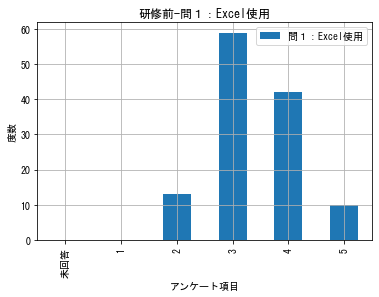

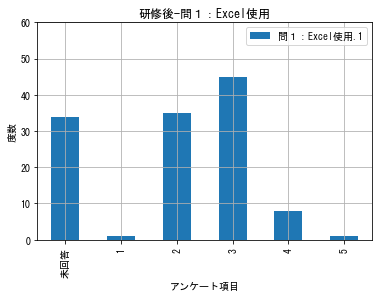

In [ ]:
#研修前問１　棒グラフ
Pre_toi1 = pd.DataFrame(Pre＿kensyu["問１：Excel使用"].value_counts().sort_index(ascending=True))
Pre_toi1 = pd.concat([AA,Pre_toi1])
Pre_toi1.plot.bar()
plt.title("研修前-問１：Excel使用", fontname="MS Gothic")
plt.xlabel("アンケート項目", fontname="MS Gothic")
plt.ylabel("度数", fontname="MS Gothic")
plt.grid(True)


#研修後問１　棒グラフ
Post_toi1 =pd.DataFrame(Post_kensyu["問１：Excel使用.1"].value_counts().sort_index(ascending=True))
Post_toi1 = Post_toi1.rename(index={0:"未回答"})
Post_toi1.plot.bar()
plt.title("研修後-問１：Excel使用", fontname="MS Gothic")
plt.xlabel("アンケート項目", fontname="MS Gothic")
plt.ylabel("度数", fontname="MS Gothic")
plt.ylim(0,60)
plt.grid(True)

----------------------------------------------------------------------------
# 研修前後アンケート　問1　円グラフ

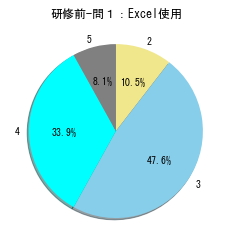

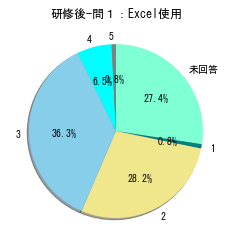

In [ ]:
#研修前問1　円グラフ

#長いので変数に格納
A = Pre＿kensyu["問１：Excel使用"].value_counts().sort_index(ascending=True)

plt.pie(A,labels=["2","3","4","5"],autopct="%.1f%%",colors=['khaki','skyblue',"cyan","gray"],shadow=True,counterclock=False,startangle=90)
plt.title("研修前-問１：Excel使用", fontname="MS Gothic")
plt.show()

#研修後アンケート問1　円グラフ
#長いので変数に格納
PostA = Post＿kensyu["問１：Excel使用.1"].value_counts().sort_index(ascending=True)

plt.pie(PostA,labels=["未回答","1","2","3","4","5"],autopct="%.1f%%",shadow=True,counterclock=False,startangle=90
       ,colors=['aquamarine','teal','khaki','skyblue',"cyan","gray"])
plt.title("研修後-問１：Excel使用", fontname="MS Gothic")
plt.show()

----------------------------------------------------------------------------
# データから考えたこと（問1）
・研修前後の棒グラフを比べると、2出来るの人数が増えていることが棒グラフから分かる。研修を通してExcelでのデータの分析やグラフ作成が少し出来るようになった人がいることが分かる。

・未回答者の人数が多いため、未回答者の結果次第では、受講者がExcelへの理解が深まったのかどうかの結果が大きく変わる

・研修後の円グラフは、4.あまり自信が無い/5出来ない人の割合が減少し、2出来る/3少しなら出来る人の割合が増加した。

----------------------------------------------------------------------------
# 研修前アンケート問2
問２：統計に関する基礎知識やデータを施策へ反映する際の注意点をどの程度知っていますか？

１人に説明できるぐらいに知っている

２人に説明はできないがある程度知っている

３少しは知っている

４ほとんど知らない

５知らない


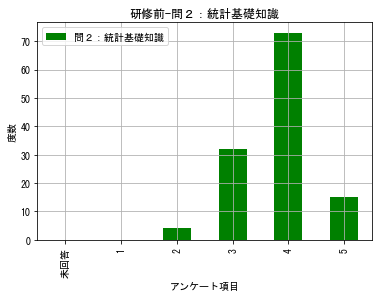

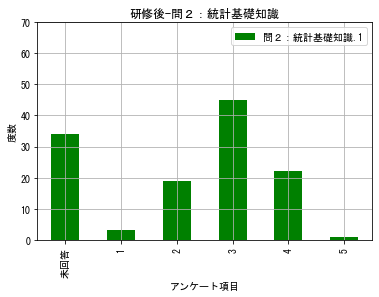

In [ ]:
#ヒストグラム"問２：統計基礎知識"
Pre_toi2 = pd.DataFrame(Pre＿kensyu["問２：統計基礎知識"].value_counts().sort_index(ascending=True))
Pre_toi2 = pd.concat([BB,Pre_toi2])
Pre_toi2.plot.bar(color="g")
plt.title("研修前-問２：統計基礎知識", fontname="MS Gothic")
plt.xlabel("アンケート項目", fontname="MS Gothic")
plt.ylabel("度数", fontname="MS Gothic")
plt.grid(True)

#研修後問2：統計基礎知識.
Post_toi2 =pd.DataFrame(Post_kensyu["問２：統計基礎知識.1"].value_counts().sort_index(ascending=True))
Post_toi2 = Post_toi2.rename(index={0:"未回答"})
Post_toi2.plot.bar(color="g")
plt.title("研修後-問２：統計基礎知識", fontname="MS Gothic")
plt.xlabel("アンケート項目", fontname="MS Gothic")
plt.ylabel("度数", fontname="MS Gothic")
plt.ylim(0,70)
plt.grid(True)

----------------------------------------------------------------------------
# 研修前後アンケート　問2　円グラフ

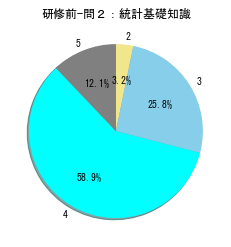

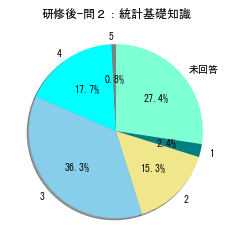

In [ ]:
#研修前問２　円グラフ

#長いので変数に格納
B = Pre＿kensyu["問２：統計基礎知識"].value_counts().sort_index(ascending=True)

plt.pie(B,labels=["2","3","4","5"],autopct="%.1f%%",colors=['khaki','skyblue',"cyan","gray"],shadow=True,counterclock=False,startangle=90)
plt.title("研修前-問２：統計基礎知識", fontname="MS Gothic")
plt.show()

#研修後問2　円グラフ
#長いので変数に格納
PostB = Post＿kensyu["問２：統計基礎知識.1"].value_counts().sort_index(ascending=True)

plt.pie(PostB,labels=["未回答","1","2","3","4","5"],autopct="%.1f%%",shadow=True,counterclock=False,startangle=90
       ,colors=['aquamarine','teal','khaki','skyblue',"cyan","gray"])
plt.title("研修後-問２：統計基礎知識", fontname="MS Gothic")
plt.show()

----------------------------------------------------------------------------
# データから考えたこと（問2）
・研修前後の棒グラフを比較すると、4ほとんど知らない　5知らないの人数が大幅に減少し　2人には説明できないがある程度知っている/3少しは知っているの人数が少し増加している

・未回答者が仮に全員4.5であったとしても1.2.3の人数は増加しているので研修を通して統計の基礎知識、データを施策へ反映させる際の注意点への理解が少し深まった印象を受ける

・円グラフを比較してみても、2.3の割合が増加していることが分かる

----------------------------------------------------------------------------
# 研修前アンケート　問3
問３：データに応じた分析手法を実施し、その結果について他者にわかりやすく説明することができますか？

１よくできる

２できる

３少しならできる

４あまり自信がない

５できない



C:\Users\Yuuki\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


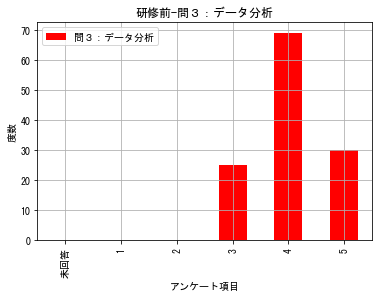

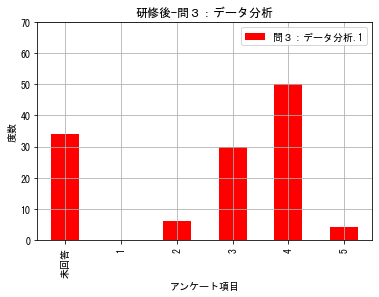

In [ ]:
#ヒストグラム "問３：データ分析"
Pre_toi3 = pd.DataFrame(Pre＿kensyu["問３：データ分析"].value_counts().sort_index(ascending=True))
Pre_toi3 = pd.concat([CC,Pre_toi3])
Pre_toi3.plot.bar(color="r")
plt.title("研修前-問３：データ分析", fontname="MS Gothic")
plt.xlabel("アンケート項目", fontname="MS Gothic")
plt.ylabel("度数", fontname="MS Gothic")
plt.grid(True)


#ヒストグラム "問３：データ分析
Post_toi3 =pd.DataFrame(Post_kensyu["問３：データ分析.1"].value_counts().sort_index(ascending=True))
Post_toi3 = Post_toi3.rename(index={0:"未回答"})

#挿入したい行を指定
ins_pos = 1
df1= Post_toi3[0:ins_pos]
df2= Post_toi3[ins_pos:]
#挿入したい値を指定
df1.loc[ins_pos] = [0]
Post_toi3 = pd.concat([df1, df2])

#棒グラフ化
Post_toi3.plot.bar(color="r")
plt.title("研修後-問３：データ分析", fontname="MS Gothic")
plt.xlabel("アンケート項目", fontname="MS Gothic")
plt.ylabel("度数", fontname="MS Gothic")
plt.ylim(0,70)
plt.grid(True)

----------------------------------------------------------------------------
# 研修前後アンケート　問3　円グラフ

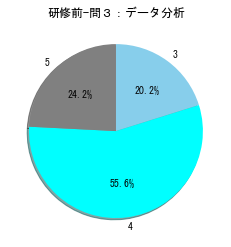

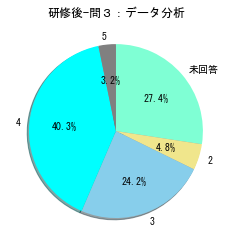

In [ ]:
#研修前問3　円グラフ

#長いので変数に格納
C = Pre＿kensyu["問３：データ分析"].value_counts().sort_index(ascending=True)

plt.pie(C,labels=["3","4","5"],autopct="%.1f%%",colors=['skyblue',"cyan","gray"],shadow=True,counterclock=False,startangle=90)
plt.title("研修前-問３：データ分析", fontname="MS Gothic")
plt.show()

#研修後アンケート問3　円グラフ

#長いので変数に格納
PostC = Post＿kensyu["問３：データ分析.1"].value_counts().sort_index(ascending=True)

plt.pie(PostC,labels=["未回答","2","3","4","5"],autopct="%.1f%%",shadow=True,counterclock=False,startangle=90
       ,colors=['aquamarine','khaki','skyblue',"cyan","gray"])
plt.title("研修後-問３：データ分析", fontname="MS Gothic")
plt.show()


----------------------------------------------------------------------------
# データから考えたこと（問3）
・4あまり自信が無い/5出来ない　の人数が大幅に減少したが2.3がわずか増加した程の印象なので未回答者の回答によってはデータに応じた分析手法の理解が余り深まらなったとも捉えられる

・円グラフからは5出来ないが大きく減少し、4が少し減少して3が少し増加している初学者の受講者が全体的に3.4といった初級（少しできる/あまり自信が無いレベル）へと移った印象を受ける

----------------------------------------------------------------------------
# 研修後アンケート　問4
問４：本研修会の理解度についてお教え下さい

1.よく理解できた

2.だいたい理解できた

3.少しだけ理解出来た

4?

5?

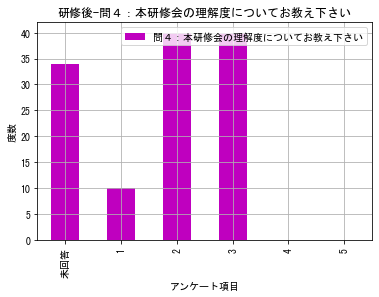

In [ ]:
#ヒストグラム "問４：本研修会の理解度についてお教え下さい
Post_toi4 =pd.DataFrame(Post_kensyu["問４：本研修会の理解度についてお教え下さい"].value_counts().sort_index(ascending=True))
Post_toi4 = Post_toi4.rename(index={0:"未回答"})

dd = pd.DataFrame([0,0],columns= ["問４：本研修会の理解度についてお教え下さい"],index=[4,5])
Post_toi4 = pd.concat([Post_toi4,dd])

Post_toi4.plot.bar(color="m")
plt.title("研修後-問４：本研修会の理解度についてお教え下さい", fontname="MS Gothic")
plt.xlabel("アンケート項目", fontname="MS Gothic")
plt.ylabel("度数", fontname="MS Gothic")
plt.grid(True)

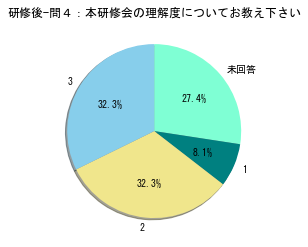

In [ ]:
#研修後アンケート問4　円グラフ
#長いので変数に格納
PostD = Post＿kensyu["問４：本研修会の理解度についてお教え下さい"].value_counts().sort_index(ascending=True)

plt.pie(PostD,labels=["未回答","1","2","3"],autopct="%.1f%%",shadow=True,counterclock=False,startangle=90
       ,colors=['aquamarine','teal','khaki','skyblue',"cyan","gray"])
plt.title("研修後-問４：本研修会の理解度についてお教え下さい", fontname="MS Gothic")
plt.show()


----------------------------------------------------------------------------
# データから考えたこと（問4）
・2だいたい　3少し　理解できた人が約６割５分を占めており　１割近くよく理解出来たと回答しているので、研修の内容をある程度は理解出来た印象を受ける

・円グラフより、未回答者の３割が仮に全く理解していと回答しても７割の受講者はある程度理解を出来た事が分かるので、研修内容は全く理解できないものではなかったと考えられる

----------------------------------------------------------------------------
# 研修後アンケート　問5
問５：本研修会の内容は、今後の業務に活かせそうですか？

１ほとんど全ての内容が活かせると思う

２だいたいの内容が活かせると思う

３一部の内容は活かせると思う

４あまり活かせそうにない

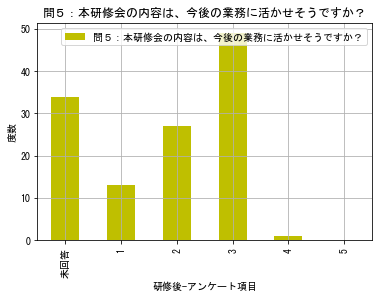

In [ ]:
#ヒストグラム "問５：本研修会の内容は、今後の業務に活かせそうですか？
Post_toi5 =pd.DataFrame(Post_kensyu["問５：本研修会の内容は、今後の業務に活かせそうですか？"].value_counts().sort_index(ascending=True))
Post_toi5 = Post_toi5.rename(index={0:"未回答"})

ee = pd.DataFrame([0],columns= ["問５：本研修会の内容は、今後の業務に活かせそうですか？"],index=[5])
Post_toi5 = pd.concat([Post_toi5,ee])

Post_toi5.plot.bar(color="y")
plt.title("問５：本研修会の内容は、今後の業務に活かせそうですか？", fontname="MS Gothic")
plt.xlabel("研修後-アンケート項目", fontname="MS Gothic")
plt.ylabel("度数", fontname="MS Gothic")
plt.grid(True)

----------------------------------------------------------------------------
# 研修後アンケート問5　円グラフ

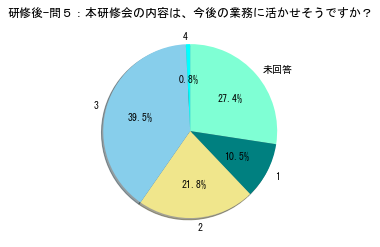

In [ ]:
#研修後アンケート問5　円グラフ

#長いので変数に格納
PostE = Post＿kensyu["問５：本研修会の内容は、今後の業務に活かせそうですか？"].value_counts().sort_index(ascending=True)

plt.pie(PostE,labels=["未回答","1","2","3","4"],autopct="%.1f%%",shadow=True,counterclock=False,startangle=90
       ,colors=['aquamarine','teal','khaki','skyblue',"cyan","gray"])
plt.title("研修後-問５：本研修会の内容は、今後の業務に活かせそうですか？", fontname="MS Gothic")
plt.show()

----------------------------------------------------------------------------
# データから考えたこと（問5）
・1ほとんどすべての内容が/2大体の内容を活かせるが３割近くなので、この層の受講者の職種と大きく関連性があるかもしれないので後日調べてみようと考える。

・3一部の内容を活かせると答えた人が４割近いので受講者や職種によっては、あまり業務に活きるイメージがわかなかった印象を受ける。特定の職種の受講者が一部活かせると回答しているのであれば
その職種のデータ利活用の内容を纏めて、研修内容の一つとして確立することも考えられる

・4あまり活かせそうにないと回答した人は未回答者を除いて１名のみなので、全体としては研修内容が業務に活きると考えている印象を受ける

In [ ]:
#研修前後アンケートのポイントと差をDataFrameに格納

Pre_Post_data = df.iloc[:,[29,30,31,32,33,34,35,36,37]].fillna(0)
Pre_Post_data.columns =["Pre_1","Post_1","delta_1","Pre_2","Post_2","delta_2","Pre_3","Post_3","delta_3"]
Pre_Post_data

,Pre_1,Post_1,delta_1,Pre_2,Post_2,delta_2,Pre_3,Post_3,delta_3
0,3,2.0,-1.0,3,2.0,-1.0,3,2.0,-1.0
1,3,0.0,0.0,3,0.0,0.0,3,0.0,0.0
2,3,3.0,0.0,4,3.0,-1.0,4,4.0,0.0
3,4,3.0,-1.0,4,3.0,-1.0,4,4.0,0.0
4,3,3.0,0.0,3,3.0,0.0,4,4.0,0.0
...,...,...,...,...,...,...,...,...,...
119,4,3.0,-1.0,4,3.0,-1.0,4,3.0,-1.0
120,5,3.0,-2.0,5,5.0,0.0,5,5.0,0.0
121,3,3.0,0.0,5,3.0,-2.0,4,4.0,0.0
122,3,2.0,-1.0,4,3.0,-1.0,4,3.0,-1.0


----------------------------------------------------------------------------
# 研修前後の箱ひげ図
※研修後の未回答者34名を除いた90名（研修前後両方回答者）を比較

※緑▲は平均値

※Pre_〇:研修前の問〇　Post_〇：研修後の問〇　 delta:差

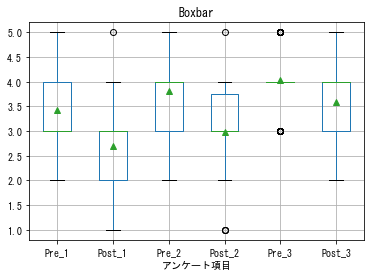

In [ ]:
#34/124名が研修後未回答
Only_kaitousya =df.iloc[:,[29,30,31,32,33,34,35,36,37]].dropna()
Only_kaitousya.columns =["Pre_1","Post_1","delta_1","Pre_2","Post_2","delta_2","Pre_3","Post_3","delta_3"]
A = Only_kaitousya.iloc[:,[0,1,3,4,6,7]]
A.plot.box(showmeans=True)
plt.title("Boxbar")
plt.xlabel("アンケート項目",fontname="MS Gothic")
plt.grid(True)

----------------------------------------------------------------------------
# 研修前後アンケート（回答者のみ）　ヴァイオリンプロット

In [ ]:
import numpy as np
from scipy import stats
import seaborn as sns

In [ ]:
Pre_1 = A["Pre_1"].values
Post_1 = A["Post_1"].values
Pre_2 = A["Pre_2"].values
Post_2 = A["Post_2"].values
Pre_3 = A["Pre_3"].values
Post_3 = A["Post_3"].values

p-value:  4.194428375412912e-10
p-value:  1.4016384336619172


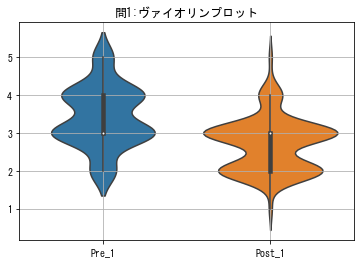

In [ ]:
#研修前後アンケート　問1
sns.violinplot(x=['Pre_1' for i in range(len(Pre_1))]+['Post_1' for i in range(len(Post_1))],
y=np.concatenate([Pre_1, Post_1]))
result = stats.wilcoxon(Pre_1, Post_1,alternative='greater')
plt.title("問1:ヴァイオリンプロット")
plt.grid(True)
print('p-value: ', result.pvalue)
print('p-value: ', 4.194428375412912*2.71828182846-10)

p-value:  2.615819319173888e-10
p-value:  -2.889465878155012


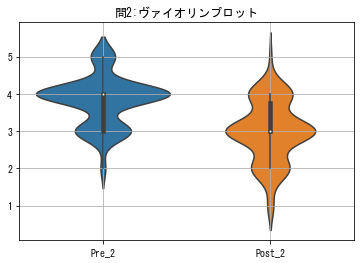

In [ ]:
#研修前後アンケート　問2
sns.violinplot(x=['Pre_2' for i in range(len(Pre_2))]+['Post_2' for i in range(len(Post_2))],
y=np.concatenate([Pre_2, Post_2]))
result = stats.wilcoxon(Pre_2, Post_2,alternative='greater')
plt.title("問2:ヴァイオリンプロット")
plt.grid(True)
print('p-value: ', result.pvalue)
print('p-value: ', 2.615819319173888*2.71828182846-10)

p-value:  2.317504543532265e-06
p-value:  0.29963048805724224


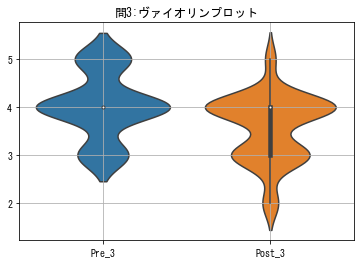

In [ ]:
#研修前後アンケート問3
sns.violinplot(x=['Pre_3' for i in range(len(Pre_3))]+['Post_3' for i in range(len(Post_3))],
y=np.concatenate([Pre_3, Post_3]))
result = stats.wilcoxon(Pre_3, Post_3,alternative='greater')
plt.title("問3:ヴァイオリンプロット")
plt.grid(True)
print('p-value: ', result.pvalue)
print('p-value: ', 2.317504543532265*2.71828182846-6)

----------------------------------------------------------------------------
# データから考えたこと（箱ひげ図とヴァイオリンプロット）
・問1に関しては、平均値が少し下がり、全体的にポイントが上昇しているので、研修を通してExcelでのデータ分析やグラフの作成があまりできない受講者層が少しできる/出来る様になったと見受けられる

・ヴァイオリンプロットからも問1は4.5の分布が少なくなり、2.3に密集していることが分かるので今回の研修でExcelの理解が初歩的なレベルには有効だったと考えられる

・問2に関しては、こちらも平均値が下がっている。統計に関する基礎知識や注意点についての理解が少し深まったと見受けられる。しかし、説明できる/説明できないがある程度知っている人の層が大きく増加していないので初学者向けの内容である為、少しばかり初歩的な理解が深まったという印象を受ける

・ヴァイオリンプロットからも問2は,4，5が減少し2にすこし3に密集した事が分かる。この研修を通して統計に関する基礎知識と注意点への理解が少し深まった印象を受ける

・問3に関しては、平均値は大きくは変化はしておらず5の出来ない人が減少し、3.4の割合が増加した。

・対応のある標本で正規分布を仮定しないという条件の元　ホイットニーの符号順位検定を行ってみたものの、有意差は見られず、問２に関してはp値がマイナスになってしまったので統計的検定は出来なかった。ホイットニーの符号順位検定の式自体を理解せずに使用してしまっているので、検定手法を理解したうえで再度、検定にかけてみたいと考える。特に問い2のp値がマイナスになるのはおかしいので数学的な理解とpython上のプログラムの理解も深める

-----------------------------------------------------------
# 仮説に対しての考察

・今回は初学者向けの研修内容であったので、問１から３のアンケート結果が3や4の少し理解できる/出来るに研修後、受講者の意見が密集していることを考えると初学者向けの研修内容としては効果があったと考察出来る。

・中級者やある程度Excelが使えたり、統計的知識を持っている受講者の、研修後のアンケート結果が変化していなければ、中級者レベルの受講者にとっては、研修内容が簡単であったと考えられるが、
研修後の未回答者の割合が多かったことや1や2の回答が増加していないことを考えると、研修内容が中級者にとって簡単であったとも、適切であったとも言い切れないと考える